In [3]:
import numpy as np
import pandas as pd
import re
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
from pandas import json_normalize

import requests 
import json
import os
from dotenv import load_dotenv

import time

#  Video games analysis and visualization

In [4]:
df_vg = pd.read_csv("./data/vgsales.csv" , index_col = "Rank" )
df_vg.head()

pd.set_option('display.max_rows', None)



In [5]:
df_vg.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [294]:
df_vg = df_vg.drop_duplicates()

In [295]:
df_vg.shape

(16597, 10)

In [ ]:
Video games

In [296]:
print(df_vg.columns)

Index(['Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')


In [297]:
df_vg.dtypes

Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

In [6]:
def drop_na(df):
    df = df.dropna(axis = 0, how="all")
    return df
df_vg = drop_na(df_vg)

In [7]:
df_vg.shape

(16598, 10)

In [300]:
pd.isna(df_vg).sum()

Name              0
Platform          0
Year            270
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [8]:
def drop_na_column(df, col_name):
    df = df[df[col_name].notna()]
    return df

In [9]:
df_vg = drop_na_column(df_vg, "Year")

In [10]:
df_vg = drop_na_column(df_vg, "Publisher")

In [11]:
df_vg.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [12]:
pd.isna(df_vg).sum()

Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

# 1- Video games Genre 


### Genre with most games releases

In [13]:
genre = df_vg["Genre"].value_counts()
genre

Action          3251
Sports          2304
Misc            1686
Role-Playing    1470
Shooter         1282
Adventure       1274
Racing          1225
Platform         875
Simulation       848
Fighting         836
Strategy         670
Puzzle           570
Name: Genre, dtype: int64

In [292]:
sns.set_style("whitegrid")
sns.set(rc={"figure.figsize": (17.,6.)})
#sns.plotting_context("talk")
sns.set_context("poster")


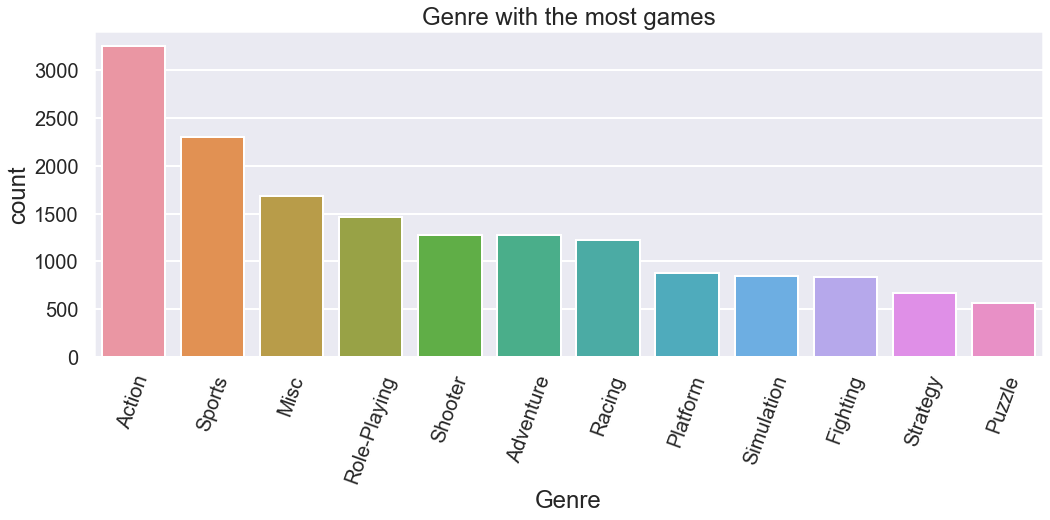

In [293]:
sns.countplot(x="Genre", data=df_vg, order = df_vg["Genre"].value_counts().index).set(title='Genre with the most games')
sns.color_palette("hls", 8)
plt.xticks(size=20)
plt.yticks(size=20)
plt.xticks(rotation=70)
plt.rcParams["axes.labelsize"] = 15

plt.savefig("./images/genre_most_games.png")

### Genre with the most sales (in millions)
Grouping by genre to get the global sales per genre 

In [18]:
Global_sale_genre = df_vg.groupby(by=['Genre'])['Global_Sales'].sum().reset_index()
Global_sale_genre
Global_sale_genre.sort_values(by = ["Global_Sales"], ascending = False)



,Genre,Global_Sales
0,Action,1722.84
10,Sports,1309.24
8,Shooter,1026.20
7,Role-Playing,923.83
4,Platform,829.13
3,Misc,789.87
6,Racing,726.76
2,Fighting,444.05
9,Simulation,389.98
5,Puzzle,242.21


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Action'),
  Text(1, 0, 'Sports'),
  Text(2, 0, 'Shooter'),
  Text(3, 0, 'Role-Playing'),
  Text(4, 0, 'Platform'),
  Text(5, 0, 'Misc'),
  Text(6, 0, 'Racing'),
  Text(7, 0, 'Fighting'),
  Text(8, 0, 'Simulation'),
  Text(9, 0, 'Puzzle'),
  Text(10, 0, 'Adventure'),
  Text(11, 0, 'Strategy')])

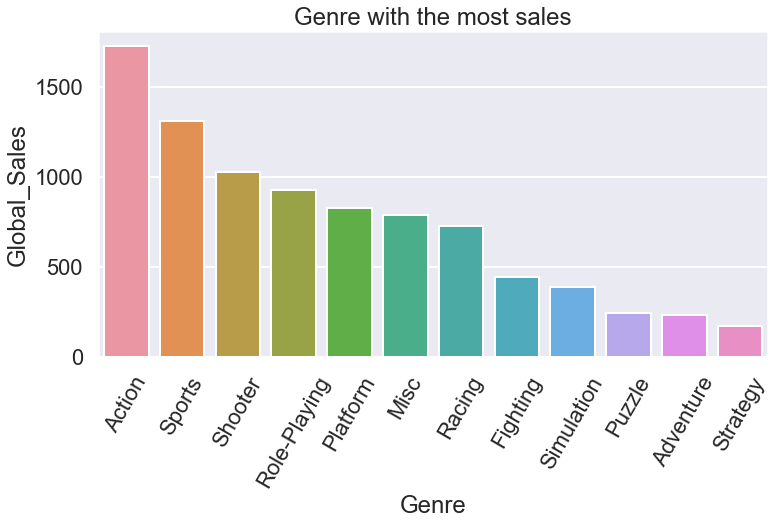

In [19]:
sns.set_style("whitegrid")
#sns.set_style("dark")
sns.set(rc={"figure.figsize": (12.,6.)})
sns.set_context("poster")
Global_sale_genre = Global_sale_genre.sort_values('Global_Sales',ascending=False)
sns.barplot(x='Genre', y='Global_Sales', data=Global_sale_genre, errorbar=('ci', 0)).set(title='Genre with the most sales')

plt.xticks(rotation=60)


### Popular genre per region


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Action'),
  Text(1, 0, 'Adventure'),
  Text(2, 0, 'Fighting'),
  Text(3, 0, 'Misc'),
  Text(4, 0, 'Platform'),
  Text(5, 0, 'Puzzle'),
  Text(6, 0, 'Racing'),
  Text(7, 0, 'Role-Playing'),
  Text(8, 0, 'Shooter'),
  Text(9, 0, 'Simulation'),
  Text(10, 0, 'Sports'),
  Text(11, 0, 'Strategy')])

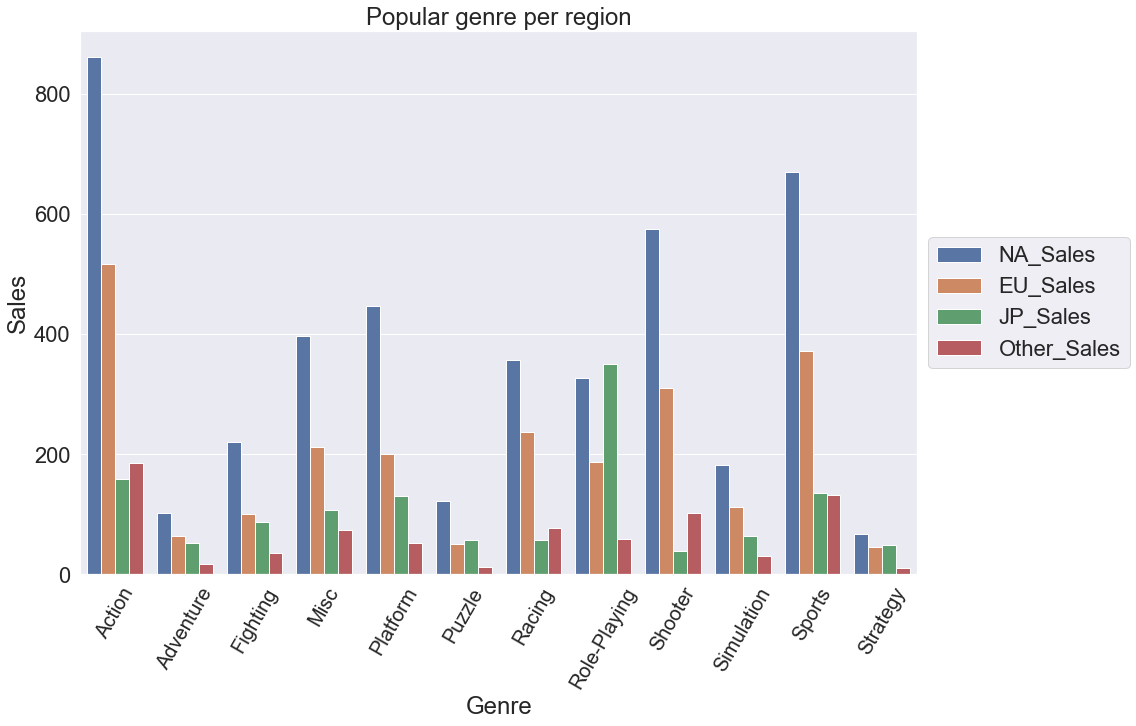

In [87]:
comp_genre = df_vg[['Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
# comp_genre
compar_map = comp_genre.groupby(by=['Genre']).sum()
popular = df_vg.groupby("Genre").agg({"NA_Sales":"sum", "EU_Sales":"sum", "JP_Sales": "sum", "Other_Sales": "sum"})
compar = compar_map.reset_index()
compar = pd.melt(compar, id_vars=['Genre'], value_vars=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], var_name='Sale_Area', value_name='Sales')
compar.head()

plt.figure(figsize=(15, 10))
sns.barplot(x='Genre', y='Sales', hue='Sale_Area', data=compar).set(title = "Popular genre per region")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
sns.set_style("dark")
plt.xticks(size=20, rotation=60)

# 2- Video games platforms 


### Platforms with the most games

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 [Text(0, 0, 'DS'),
  Text(1, 0, 'PS2'),
  Text(2, 0, 'PS3'),
  Text(3, 0, 'Wii'),
  Text(4, 0, 'X360'),
  Text(5, 0, 'PSP'),
  Text(6, 0, 'PS'),
  Text(7, 0, 'PC'),
  Text(8, 0, 'XB'),
  Text(9, 0, 'GBA'),
  Text(10, 0, 'GC'),
  Text(11, 0, '3DS'),
  Text(12, 0, 'PSV'),
  Text(13, 0, 'PS4'),
  Text(14, 0, 'N64'),
  Text(15, 0, 'SNES'),
  Text(16, 0, 'XOne'),
  Text(17, 0, 'SAT'),
  Text(18, 0, 'WiiU'),
  Text(19, 0, '2600'),
  Text(20, 0, 'NES'),
  Text(21, 0, 'GB'),
  Text(22, 0, 'DC'),
  Text(23, 0, 'GEN'),
  Text(24, 0, 'NG'),
  Text(25, 0, 'SCD'),
  Text(26, 0, 'WS'),
  Text(27, 0, '3DO'),
  Text(28, 0, 'TG16'),
  Text(29, 0, 'GG'),
  Text(30, 0, 'PCFX')])

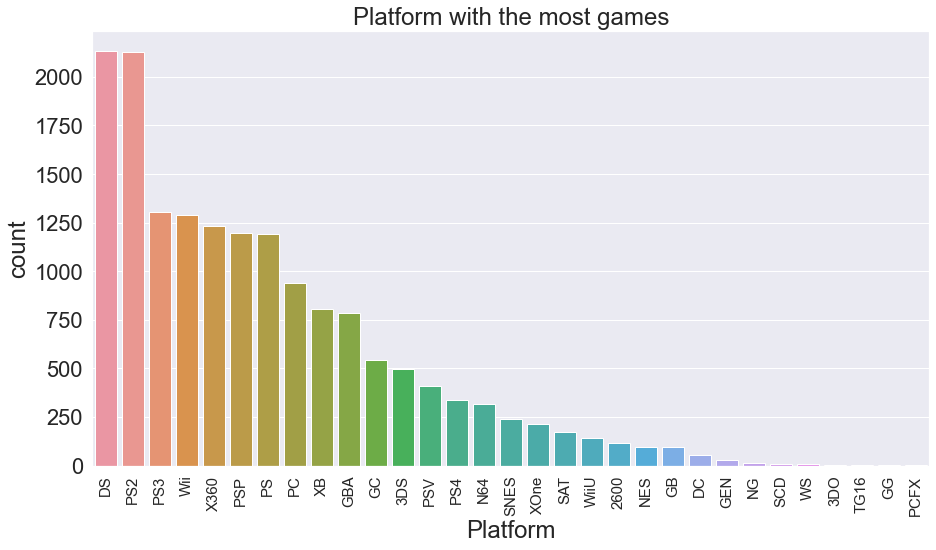

In [58]:
platform = df_vg["Platform"].value_counts()
platform
sns.countplot(x="Platform", data=df_vg, order = df_vg["Platform"].value_counts().index).set(title='Platform with the most games')
sns.color_palette("hls", 8)
plt.xticks(size=15, rotation=90)

### The platform with the most sales


In [86]:
Global_sale_plat = df_vg.groupby(by=['Platform'])['Global_Sales'].sum().reset_index()
#Global_sale_plat



(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]),
 [Text(0, 0, 'PS2'),
  Text(1, 0, 'X360'),
  Text(2, 0, 'PS3'),
  Text(3, 0, 'Wii'),
  Text(4, 0, 'DS'),
  Text(5, 0, 'PS'),
  Text(6, 0, 'GBA'),
  Text(7, 0, 'PSP'),
  Text(8, 0, 'PS4'),
  Text(9, 0, 'PC'),
  Text(10, 0, 'GB'),
  Text(11, 0, 'XB'),
  Text(12, 0, 'NES'),
  Text(13, 0, '3DS'),
  Text(14, 0, 'N64'),
  Text(15, 0, 'SNES'),
  Text(16, 0, 'GC'),
  Text(17, 0, 'XOne'),
  Text(18, 0, '2600'),
  Text(19, 0, 'WiiU'),
  Text(20, 0, 'PSV'),
  Text(21, 0, 'SAT')])

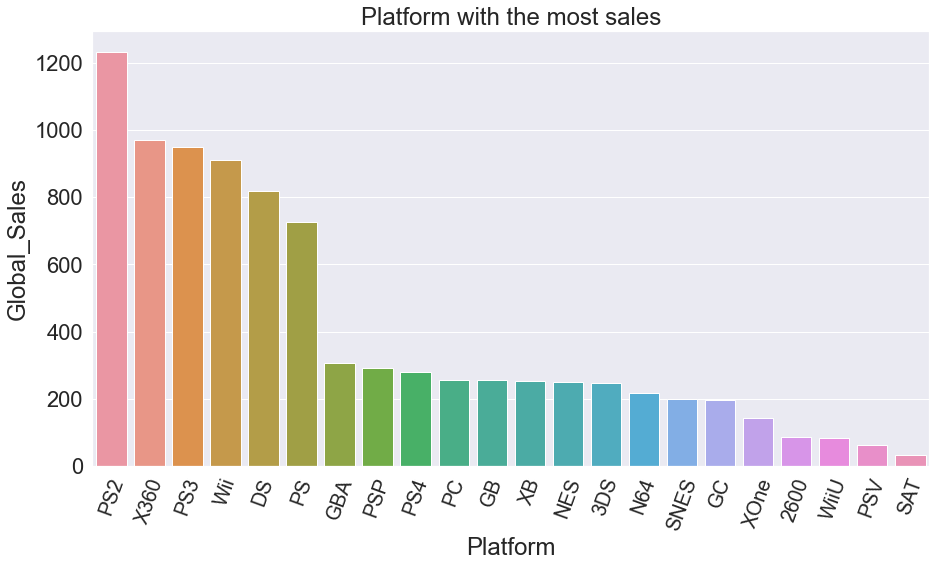

In [85]:
top_plat_sales = Global_sale_plat[Global_sale_plat['Global_Sales'] > 30]
top_plat_sales = top_plat_sales.sort_values(by = ["Global_Sales"], ascending = False)
platform_plot = sns.barplot(x='Platform', y='Global_Sales', data=top_plat_sales).set(title='Platform with the most sales')
plt.xticks(size=20, rotation=70)


# 3-Video games poularity over the years '1980-2020'

## Global sales per genre per year
Grouping per Genre and year to get the total global sales  
Limiting the Global sales to the values larger than 700 million

In [88]:
Global_sale_genre_year = df_vg.groupby(by=['Genre',"Year"])['Global_Sales'].sum().reset_index().sort_values(by = ["Global_Sales"], ascending = False)
Global_sale_genre_year.sample()

,Genre,Year,Global_Sales
24,Action,2004,76.26


In [89]:
top_genere_sales = Global_sale_genre[Global_sale_genre['Global_Sales'] > 700]
top_genere_sales

,Genre,Global_Sales
0,Action,1722.84
10,Sports,1309.24
8,Shooter,1026.20
7,Role-Playing,923.83
4,Platform,829.13
3,Misc,789.87
6,Racing,726.76


Crossing Genre values from 2 tables   
-->top_genere_sales: where we limited the global sales value to 700  
-->Global_sale_genre_year : where we filter by genre

In [ ]:
Global_sale_genre_year = Global_sale_genre_year[Global_sale_genre_year['Genre'].isin(top_genere_sales['Genre'])]


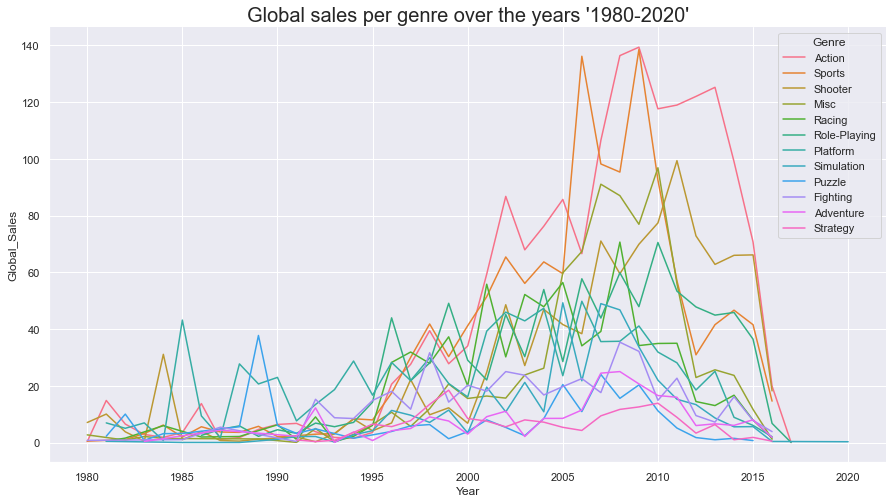

In [96]:
#line plot sales per genre per year
sns.set(rc={"figure.figsize": (15.,8.)})

line =sns.lineplot(x = "Year", y= "Global_Sales", hue = "Genre",data = Global_sale_genre_year)
line.set_title("Global sales per genre over the years '1980-2020'",fontsize=20)
sns.set(font_scale=1)
sns.despine()


# Year with the most Sales
Limiting the years starting from 1990, the sales value before are very low

In [90]:
df_vg["Year"] = df_vg["Year"].astype(int)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]),
 [Text(0, 0, '2009'),
  Text(1, 0, '2008'),
  Text(2, 0, '2010'),
  Text(3, 0, '2007'),
  Text(4, 0, '2011'),
  Text(5, 0, '2006'),
  Text(6, 0, '2005'),
  Text(7, 0, '2002'),
  Text(8, 0, '2003'),
  Text(9, 0, '2004'),
  Text(10, 0, '2012'),
  Text(11, 0, '2015'),
  Text(12, 0, '2014'),
  Text(13, 0, '2013'),
  Text(14, 0, '2001'),
  Text(15, 0, '1998'),
  Text(16, 0, '2000'),
  Text(17, 0, '2016'),
  Text(18, 0, '1999'),
  Text(19, 0, '1997'),
  Text(20, 0, '1996'),
  Text(21, 0, '1995'),
  Text(22, 0, '1994'),
  Text(23, 0, '1993'),
  Text(24, 0, '1992'),
  Text(25, 0, '1991'),
  Text(26, 0, '2017'),
  Text(27, 0, '2020')])

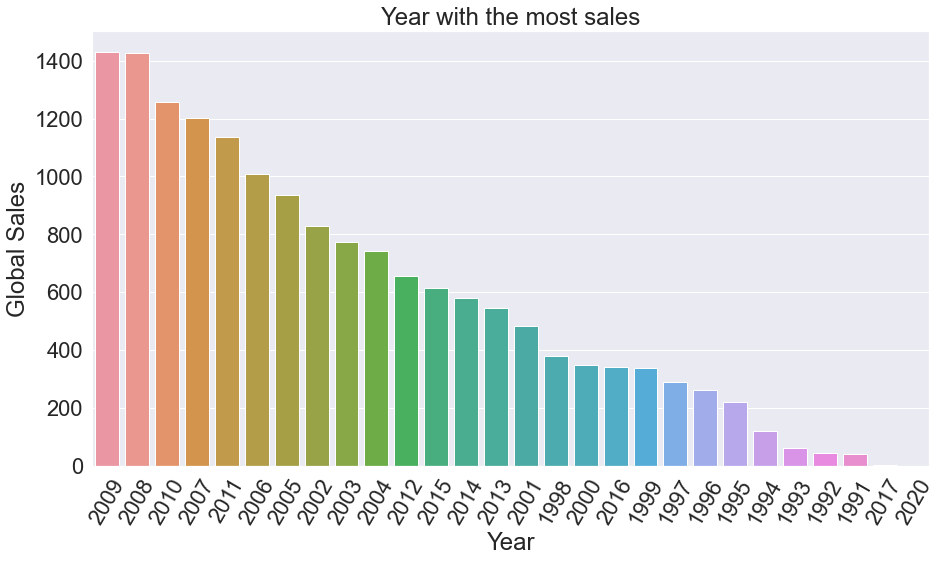

In [91]:
year_vg = df_vg[df_vg['Year'] > 1990]
sns.set(font_scale=2)
sns.countplot(x="Year", data=year_vg, order = year_vg.groupby(by=['Year'])['Name'].count().sort_values(ascending=False).index).set(title='Year with the most sales')
#plot1.set(xlabel='Year', ylabel='Global sales')
plt.xlabel('Year')
plt.ylabel('Global Sales')
plt.xticks(rotation=60)


Text(0.5, 1.0, "Evolution of Global sales over the years '1980-2020'")

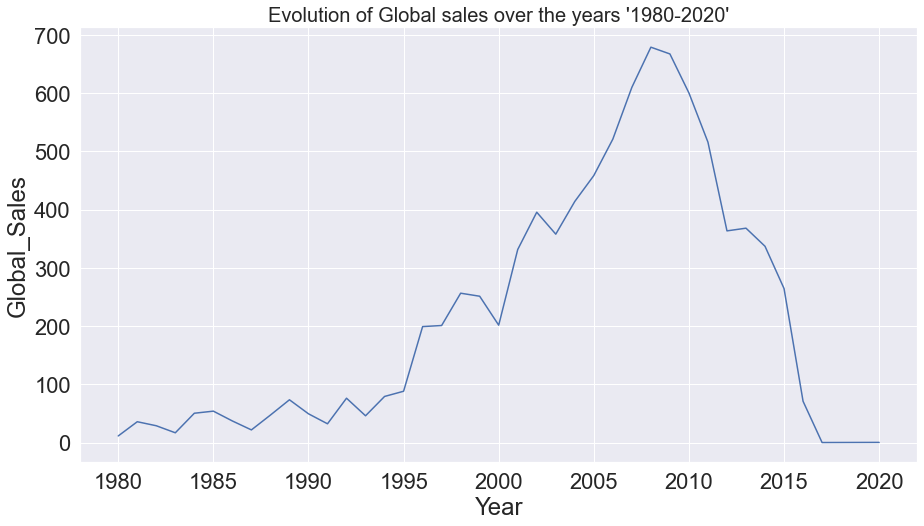

In [95]:
Global_sale_top_year = df_vg.groupby(by=["Year"])['Global_Sales'].sum().reset_index().sort_values(by = ["Year"], ascending = False)


line2 = sns.lineplot(x = "Year", y= "Global_Sales",data = Global_sale_top_year)
line2.set_title("Evolution of Global sales over the years '1980-2020'",fontsize=20)

## Sales in the Top 5 years per genre

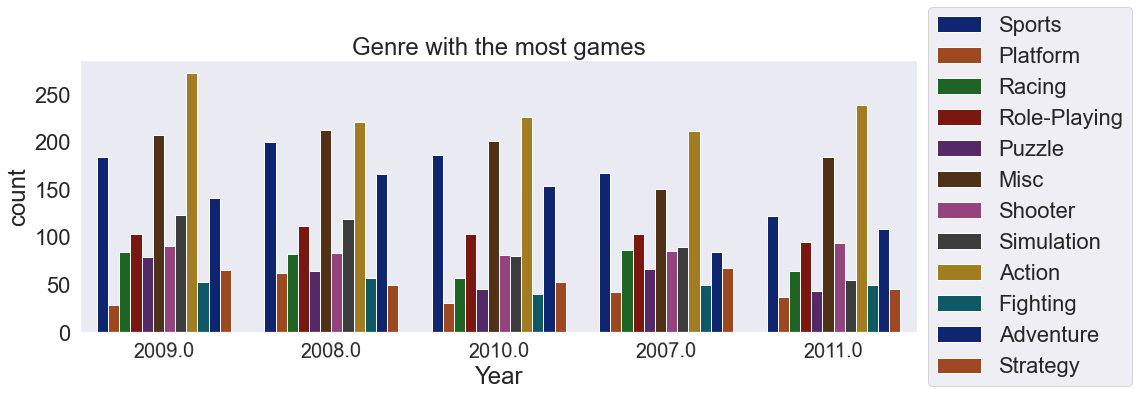

In [135]:
agg_year_genre= df_vg.groupby(["Genre","Year"]).agg({"NA_Sales":"sum", "EU_Sales":"sum", "JP_Sales": "sum", "Other_Sales": "sum"})
agg_year_genre


plt.figure(figsize=(15, 5))
sns.countplot(x="Year", data=df_vg, hue='Genre', order=df_vg.Year.value_counts().iloc[:5].index, palette="dark").set(title='Top 5 years per genre')
plt.xticks(size=20, rotation=1)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
sns.set_style("dark")



In [172]:
test_agg_year_genre= df_vg.groupby(["Year"]).agg({"NA_Sales":"sum", "EU_Sales":"sum", "JP_Sales": "sum", "Other_Sales": "sum"})
test_agg_year_genre

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Year,,,,
1980,10.59,0.67,0.00,0.12
1981,33.40,1.96,0.00,0.32
1982,26.92,1.65,0.00,0.31
1983,7.76,0.80,8.10,0.14
1984,33.28,2.10,14.27,0.70
1985,33.73,4.74,14.56,0.92
1986,12.50,2.84,19.81,1.93
1987,8.46,1.41,11.63,0.20
1988,23.87,6.59,15.76,0.99


In [122]:
top_sale_region_year = df_vg.groupby(by=["Year"])[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum().reset_index()
melt_plot = top_sale_region_year.melt(id_vars=["Year"], var_name="Region", value_name="Total")
melt_plot = melt_plot.sort_values('Total',ascending=False)


In [170]:
hey = melt_plot.groupby(["Region"])["Total"].sum()
hey

Region
EU_Sales       2406.69
JP_Sales       1284.27
NA_Sales       4327.65
Other_Sales     788.91
Name: Total, dtype: float64

In [187]:
hello = melt_plot.sort_values(by="Total", ascending=False)[:50]
hello.head()

,Year,Region,Total
28,2008,NA_Sales,351.44
29,2009,NA_Sales,338.85
27,2007,NA_Sales,311.18
30,2010,NA_Sales,304.24
26,2006,NA_Sales,263.12


<AxesSubplot: xlabel='Year', ylabel='Total'>

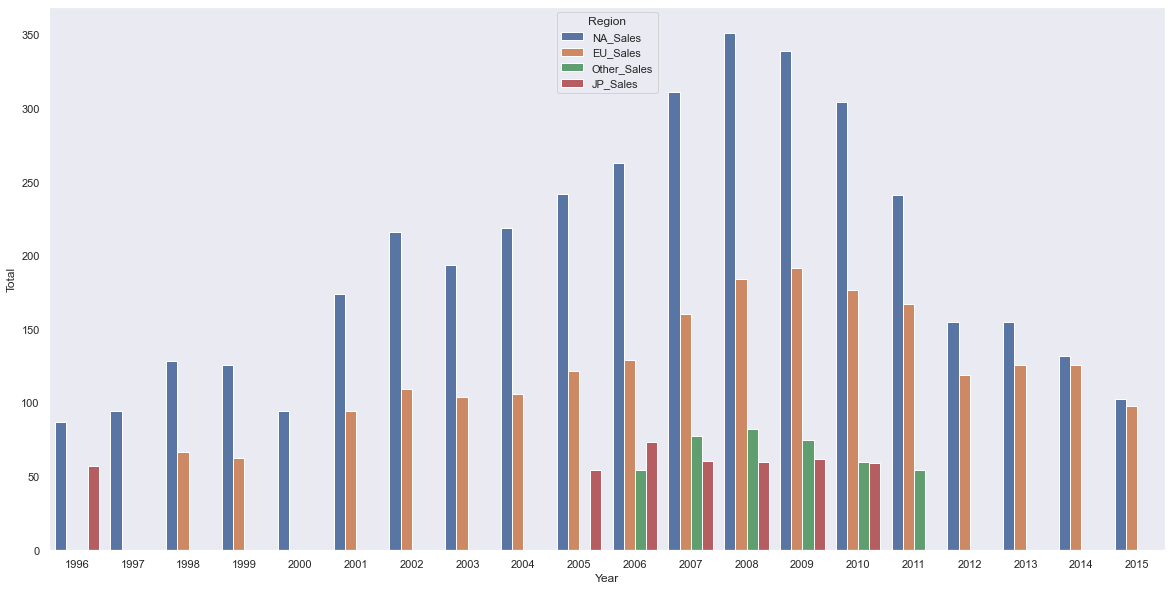

In [194]:
sns.barplot(data=hello, x="Year", y="Total", hue="Region")

In [ ]:
#to review
data_year = df_vg.groupby(by=['Year'])['Global_Sales'].sum().reset_index()
top_sale_years = data_year.groupby("Year")['Global_Sales'].sum().reset_index().sort_values("Global_Sales", ascending = False).head(6)
data_top_genre_year = data_year[data_year["Year"].isin(top_sale_years["Year"])]
data_top_genre_year = data_top_genre_year[data_top_genre_year["Genre"].isin(top_genere_sales["Genre"])]
sns.set(rc={'figure.figsize':(20,10)})

In [366]:
#data_top_genre_year

In [367]:
df_vg_pairplt = df_vg.loc[:,["Year","Platform", "Genre", "NA_Sales","EU_Sales", "Other_Sales"]]
#df_vg_pairplt

C:\Users\34603\miniconda3\lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


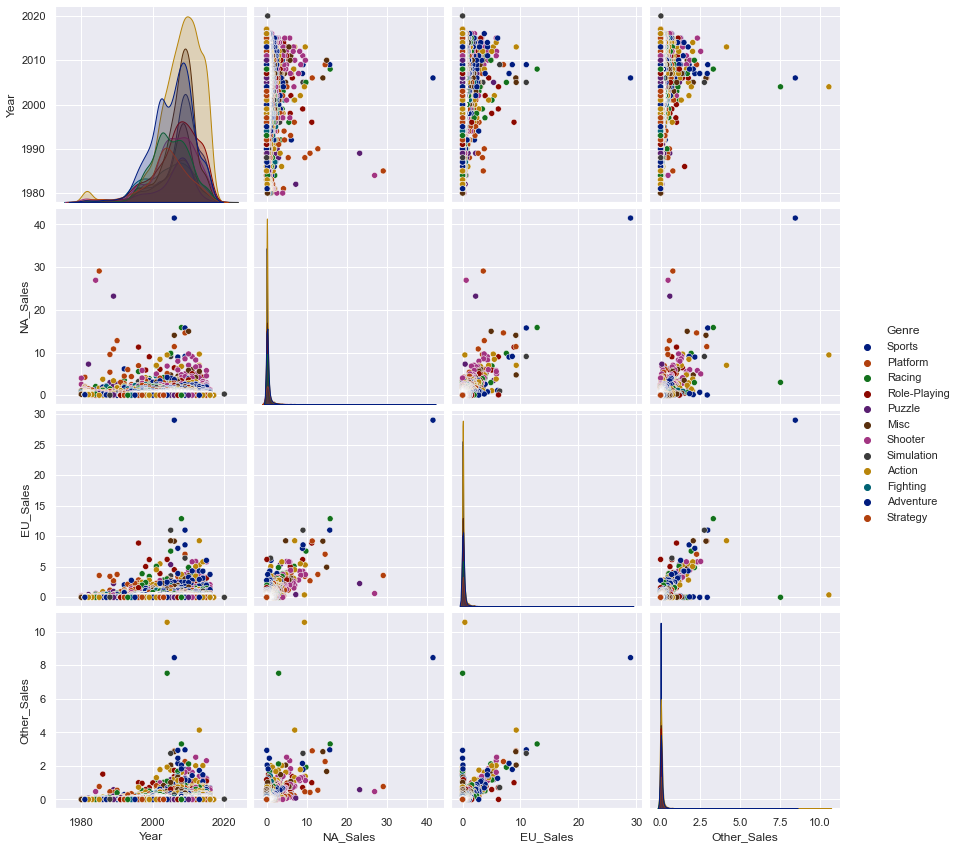

In [336]:
sns.pairplot(df_vg_pairplt, hue='Genre', palette = "dark", size =3)

,Platform,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,
1,Wii,2006.0,41.49,29.02,3.77,8.46,82.74
2,NES,1985.0,29.08,3.58,6.81,0.77,40.24
3,Wii,2008.0,15.85,12.88,3.79,3.31,35.82
4,Wii,2009.0,15.75,11.01,3.28,2.96,33.00
5,GB,1996.0,11.27,8.89,10.22,1.00,31.37


In [ ]:
#trying rename columns

for i in columns
    df = df.rename(columns="NA_Sales": "region", inplace=True)
    df = df.rename(columns={"EU_Sales":f"{region}"}, inplace=True)
    df = df.rename(columns={"JP_Sales":f"{region}"}, inplace=True)
    return(df)


In [48]:
top_sale_region = df_vg[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
top_sale_region = top_sale_region.sum().reset_index()
top_sale_region = top_sale_region.rename(columns={'index': 'Region', 0: 'Sale'})
top_sale_region

,Region,Sale
0,NA_Sales,4327.65
1,EU_Sales,2406.69
2,JP_Sales,1284.27
3,Other_Sales,788.91


C:\Users\34603\AppData\Local\Temp\ipykernel_14944\1223053990.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 0)` for the same effect.

  sns.barplot(x='Region', y='Total', data = melt_plot, ci= 0)


<function seaborn.categorical.barplot(data=None, *, x=None, y=None, hue=None, order=None, hue_order=None, estimator='mean', errorbar=('ci', 95), n_boot=1000, units=None, seed=None, orient=None, color=None, palette=None, saturation=0.75, width=0.8, errcolor='.26', errwidth=None, capsize=None, dodge=True, ci='deprecated', ax=None, **kwargs)>

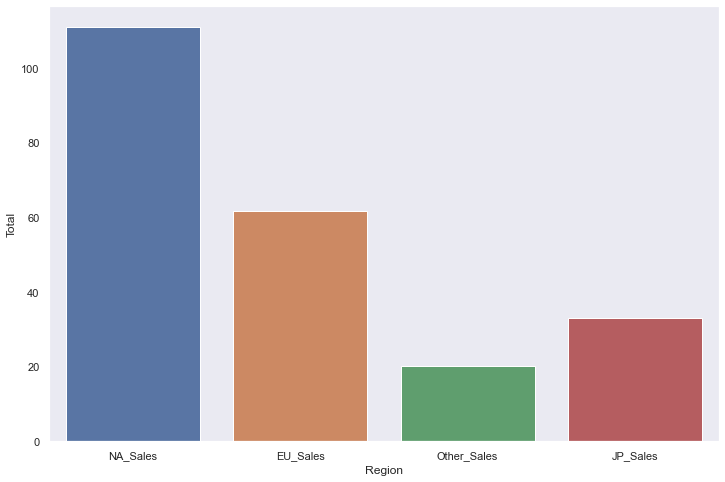

In [195]:
plt.figure(figsize=(12, 8))
#sns.barplot(x='Region', y='Total', data = melt_plot, title="Global sales per region")
sns.barplot(x='Region', y='Total', data = melt_plot, ci= 0)
sns.barplot

# 4-Crossing data using API

We are getting data from the website World Bank using API.  
The data we are intested in, is the birth rate globally and per region ( according to regions we have in our dataframe)  

*For global birth rate --> https://api.worldbank.org/v2/country/WLD/indicator/SP.DYN.CBRT.IN?format=json.  

*For North America birth rate --> https://api.worldbank.org/v2/country/NAC/indicator/SP.DYN.CBRT.IN?format=json.

*For EU rate --> https://api.worldbank.org/v2/country/EUU/indicator/SP.DYN.CBRT.IN?format=json.   

*For Japan birth rate -->  https://api.worldbank.org/v2/country/JPN/indicator/SP.DYN.CBRT.IN?format=json.  







In [ ]:
import requests

In [201]:
def api_birth_region(region):
    response_req = requests.get(f"https://api.worldbank.org/v2/country/{region}/indicator/SP.DYN.CBRT.IN?format=json")
    df = pd.DataFrame.from_dict(response_req.json()[1], orient = "columns")
    df = df.drop(columns=["indicator","country","decimal","countryiso3code","obs_status","unit"])
    df.rename(columns={"value":f"{region}_birth"}, inplace=True)
    df["date"] = df["date"].astype(int)
    return df

In [202]:
api_birth_region("WLD").head()

,date,WLD_birth
0,2021,NaN
1,2020,17.333599
2,2019,17.877772
3,2018,18.148411
4,2017,18.665071


In [203]:
df_birth = api_birth_region("WLD")


In [204]:
Global_sale_top_year["Year"] = Global_sale_top_year["Year"].astype(int)



In [208]:
#merge global with global birth rate per 1000 people
b = pd.merge(df_birth, Global_sale_top_year, how = "inner", left_on = "date", right_on = "Year")


In [209]:
b.head()


,date,WLD_birth,Year,Global_Sales
0,2020,17.333599,2020,0.29
1,2017,18.665071,2017,0.05
2,2016,19.070894,2016,70.90
3,2015,18.952225,2015,264.44
4,2014,19.464192,2014,337.03


Source :https://data.worldbank.org/indicator/SP.DYN.CBRT.IN?end=2020&start=1960&view=chart

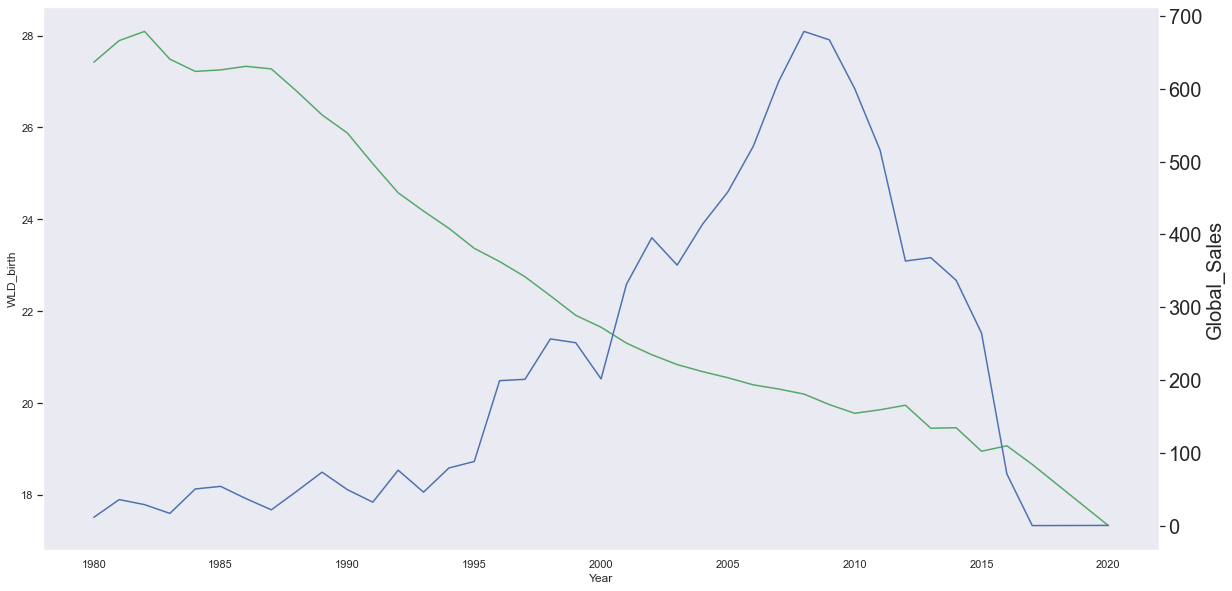

In [235]:
ax2 = sns.lineplot(data=b,x = "Year", y = "WLD_birth", color="g")
ax2 = plt.twinx()
ax2.set_ylabel("Global_Sales",fontsize=20)
sns.lineplot(data=b,x = "Year", y ="Global_Sales", color="b", ax=ax2)
g.set_title("Evolution of Global sales over the years '1980-2020'",fontsize=20)
g.set_xlabel("Year",fontsize=30)
g.set_ylabel("WLD_birth",fontsize=30)
ax2.tick_params(labelsize=20)

<AxesSubplot: xlabel='Year', ylabel='Global_Sales'>

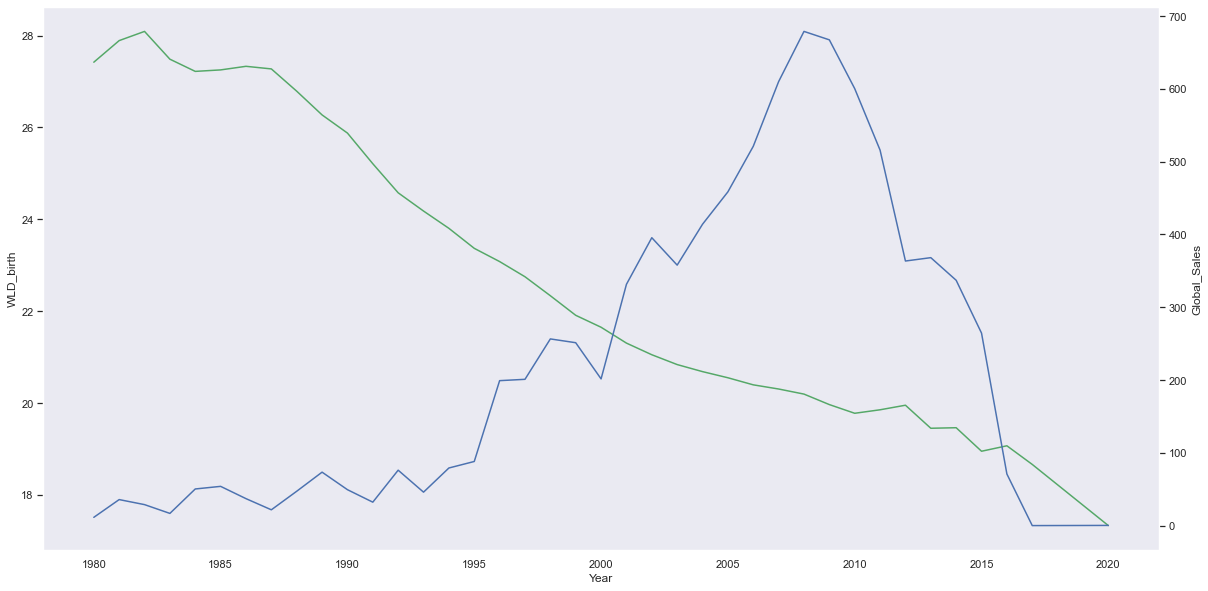

In [232]:
sns.lineplot(data=b,x = "Year", y = "WLD_birth", color="g")
ax2 = plt.twinx()
sns.lineplot(data=b,x = "Year", y ="Global_Sales", color="b", ax=ax2)


In [447]:
df_corr = b.drop(columns=["Year","date"])
df_corr.corr()

,value,Global_Sales
value,1.00000,-0.63808
Global_Sales,-0.63808,1.00000


In [459]:
regional_sale_top_year = df_vg.groupby(by=["Year"])['NA_Sales','EU_Sales','JP_Sales'].sum().reset_index().sort_values(by = ["Year"], ascending = False)
regional_sale_top_year

C:\Users\34603\AppData\Local\Temp\ipykernel_9516\2108748877.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  regional_sale_top_year = df_vg.groupby(by=["Year"])['NA_Sales','EU_Sales','JP_Sales'].sum().reset_index().sort_values(by = ["Year"], ascending = False)


,Year,NA_Sales,EU_Sales,JP_Sales
38,2020.0,0.27,0.00,0.00
37,2017.0,0.00,0.00,0.05
36,2016.0,22.66,26.76,13.67
35,2015.0,102.82,97.71,33.72
34,2014.0,131.97,125.63,39.46
33,2013.0,154.77,125.80,47.59
32,2012.0,154.93,118.76,51.74
31,2011.0,241.00,167.31,53.04
30,2010.0,304.24,176.57,59.49
29,2009.0,338.85,191.59,61.89


In [481]:
#https://api.worldbank.org/v2/country/EUU/indicator/SP.DYN.CBRT.IN?format=json

In [245]:
api_birth_region("EUU").sample()


,date,EUU_birth
4,2017,9.716724


In [239]:
EUU_birth = api_birth_region("EUU")


In [197]:
EUU_sale_top_year = df_vg.groupby(by=["Year"])['EU_Sales'].sum().reset_index().sort_values(by = ["Year"], ascending = False)
EUU_sale_top_year.head()

,Year,EU_Sales
38,2020,0.00
37,2017,0.00
36,2016,26.76
35,2015,97.71
34,2014,125.63


In [242]:
#merge EUU sales with global birth rate per 1000 people
c = pd.merge(EUU_birth, EUU_sale_top_year, how = "inner", left_on = "date", right_on = "Year")
c.head()

,date,EUU_birth,Year,EU_Sales
0,2020,9.043593,2020,0.00
1,2017,9.716724,2017,0.00
2,2016,9.839702,2016,26.76
3,2015,9.741875,2015,97.71
4,2014,9.858278,2014,125.63


<AxesSubplot: xlabel='Year', ylabel='EU_Sales'>

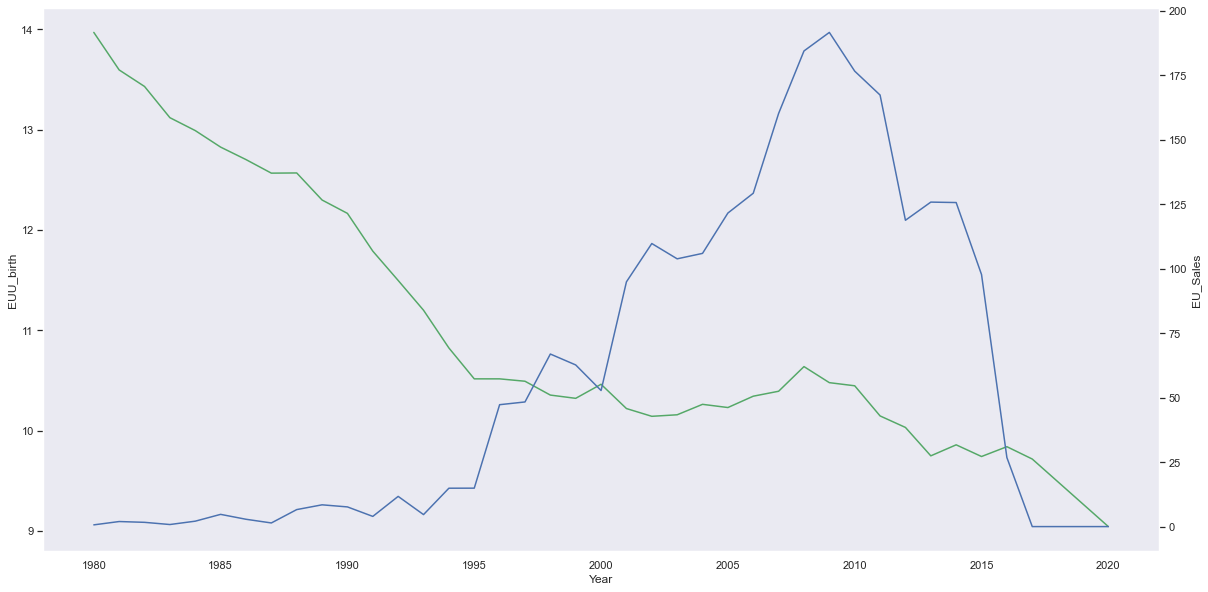

In [248]:
sns.lineplot(data=c,x = "Year", y = "EUU_birth", color="g")
ax2 = plt.twinx()
sns.lineplot(data=c,x = "Year", y ="EU_Sales", color="b", ax=ax2)

In [551]:
#https://api.worldbank.org/v2/country/NAC/indicator/SP.DYN.CBRT.IN?format=json
api_birth_region("NAC").head()


,date,NAC_birth
0,2021,NaN
1,2020,10.745197
2,2019,11.245336
3,2018,11.446666
4,2017,11.647963


In [249]:
NA_birth = api_birth_region("NAC").head()


In [270]:
NA_sale_top_year = df_vg.groupby(by=["Year"])['NA_Sales'].sum().reset_index().sort_values(by = ["Year"], ascending = False)


In [271]:
#merge NA sales with global birth rate per 1000 people
d = pd.merge(NA_birth, NA_sale_top_year, how = "inner", left_on = "date", right_on = "Year")


<AxesSubplot: xlabel='date', ylabel='NA_Sales'>

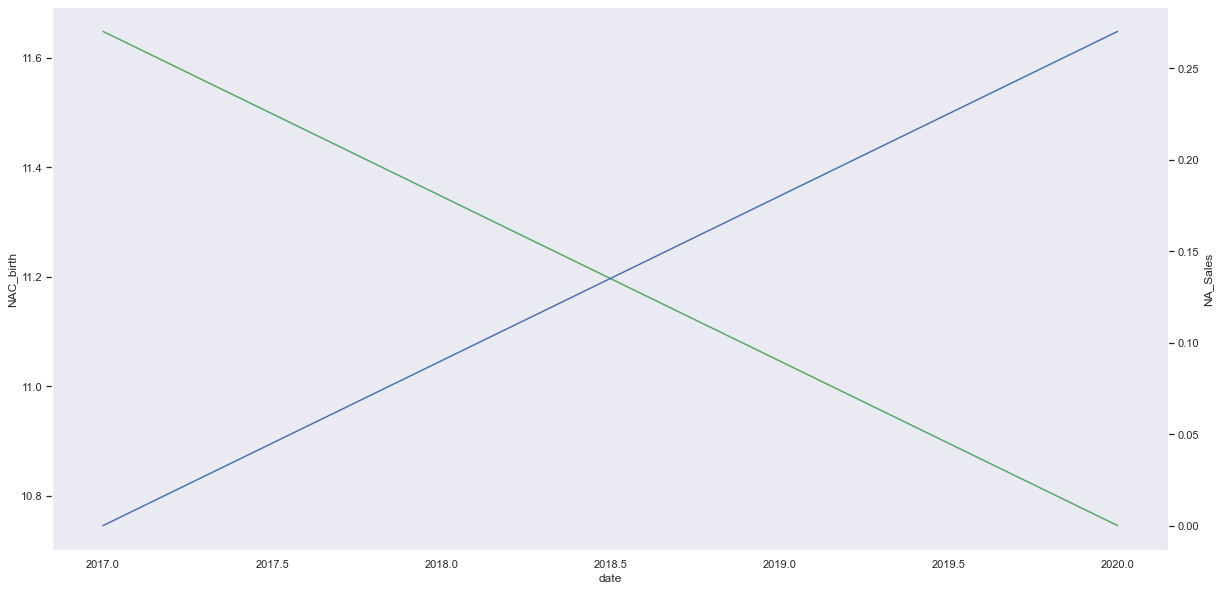

In [273]:
sns.lineplot(data=d,x = "date", y = "NAC_birth", color="g")
ax2 = plt.twinx()
sns.lineplot(data=d,x = "date", y ="NA_Sales", color="b", ax=ax2)

In [255]:
df1_corr = d.drop(columns=["Year","date"])
df1_corr.corr()

,NAC_birth,NA_Sales
NAC_birth,1.0,-1.0
NA_Sales,-1.0,1.0


In [552]:
#https://api.worldbank.org/v2/country/JPN/indicator/SP.DYN.CBRT.IN?format=json
api_birth_region("JPN").head()

,date,JPN_birth
0,2021,NaN
1,2020,6.8
2,2019,7.0
3,2018,7.4
4,2017,7.6


In [261]:
JP_birth = api_birth_region("JPN").head()


In [262]:
JP_birth.head()

,date,JPN_birth
0,2021,NaN
1,2020,6.8
2,2019,7.0
3,2018,7.4
4,2017,7.6


In [259]:
JP_sale_top_year = df_vg.groupby(by=["Year"])['JP_Sales'].sum().reset_index().sort_values(by = ["Year"], ascending = False)
JP_sale_top_year.head()

,Year,JP_Sales
38,2020,0.00
37,2017,0.05
36,2016,13.67
35,2015,33.72
34,2014,39.46


In [267]:
#merge NA sales with global birth rate per 1000 people
j = pd.merge(JP_birth, JP_sale_top_year, how = "inner", left_on = "date", right_on = "Year")
j.head()

,date,JPN_birth,Year,JP_Sales
0,2020,6.8,2020,0.00
1,2017,7.6,2017,0.05


In [265]:
x = pd.merge(df_birth, Global_sale_top_year, how = "inner", left_on = "date", right_on = "Year")

<AxesSubplot: xlabel='Year', ylabel='JP_Sales'>

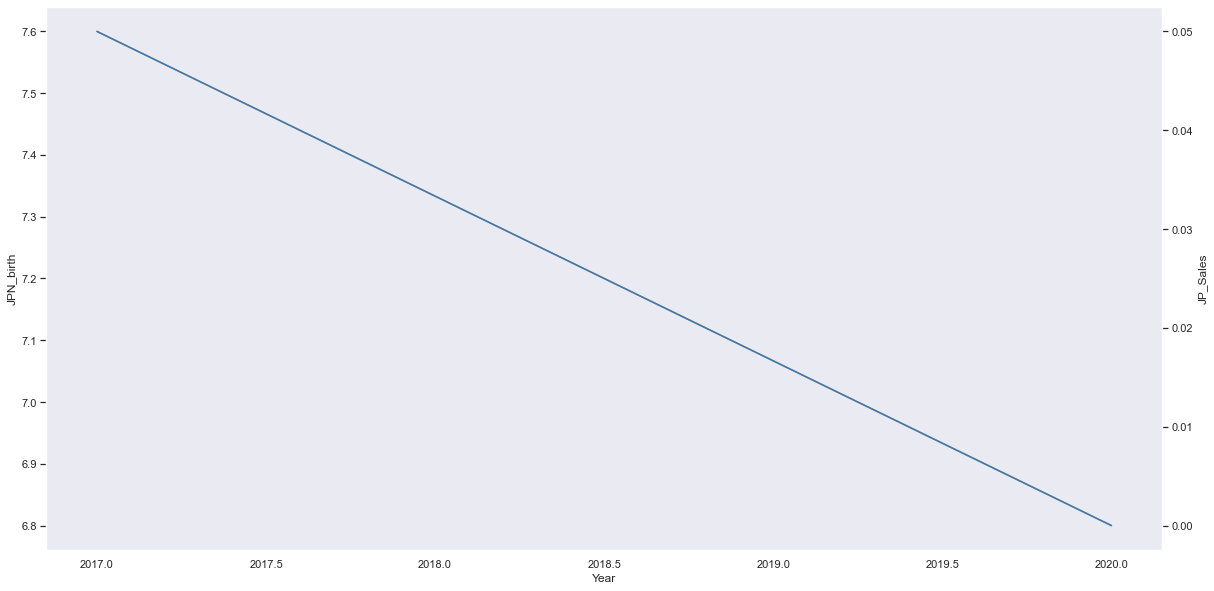

In [268]:
sns.lineplot(data=j,x = "Year", y = "JPN_birth", color="g")
ax2 = plt.twinx()
sns.lineplot(data=j,x = "Year", y ="JP_Sales", color="b", ax=ax2)